In [1963]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns
import scvelo as scv

In [2891]:
#preprocess cell by hashsolo 
exp97=sc.read('exp97_solo.h5',gex_only=False)
exp97=exp97[exp97.obs['most_likely_hypothesis']==1,:]

In [2892]:
exp97

View of AnnData object with n_obs × n_vars = 6648 × 36698
    obs: 'most_likely_hypothesis', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome'

In [2893]:
# sc.pp.filter_cells(exp97, min_genes=500)
# sc.pp.filter_genes(exp97, min_cells=3)
exp97.var['mt'] = exp97.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp97, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
exp97

Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 6648 × 36698
    obs: 'most_likely_hypothesis', 'Classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

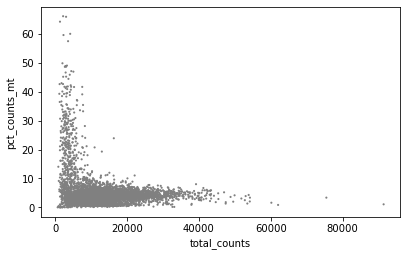

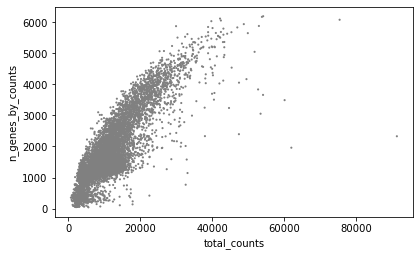

In [2894]:
sc.pl.scatter(exp97, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp97, x='total_counts', y='n_genes_by_counts')

In [2944]:
exp97 = exp97[exp97.obs.total_counts < 45000, :]
exp97 = exp97[exp97.obs.pct_counts_mt < 10, :]

In [2945]:
exp97r=exp97.copy()
hto=exp97[:,exp97.var_names.str.startswith('HTO')].copy()
rnap = exp97[:, ~(exp97.var_names.str.startswith('HTO'))].copy()

In [2946]:
sc.pp.recipe_zheng17(rnap)
# sc.pp.filter_genes(rnap, min_counts=1)  # only consider genes with more than 1 count
# sc.pp.normalize_per_cell(                # normalize with total UMI count per cell
#          rnap, key_n_counts='n_counts_all')
# filter_result = sc.pp.filter_genes_dispersion(  # select highly-variable genes
#         rnap.X, flavor='cell_ranger', n_top_genes=n_top_genes, log=False)
# rnap = rnap[:, filter_result.gene_subset]     # subset the genes
# sc.pp.normalize_per_cell(rnap)          # renormalize after filtering
# if log: sc.pp.log1p(rnap)               # log transform: adata.X = log(adata.X + 1)
# sc.pp.scale(rnap)                       # scale to unit variance and shift to zero mean
rnap

AnnData object with n_obs × n_vars = 6255 × 1000
    obs: 'most_likely_hypothesis', 'Classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_all'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts', 'mean', 'std'
    uns: 'log1p'

In [2947]:
sc.tl.pca(rnap, svd_solver='arpack')


In [2948]:
sc.pp.neighbors(rnap, n_neighbors=20,n_pcs=40)
sc.tl.louvain(rnap, resolution=0.4,key_added = "louvain")
sc.tl.paga(rnap, groups='louvain')


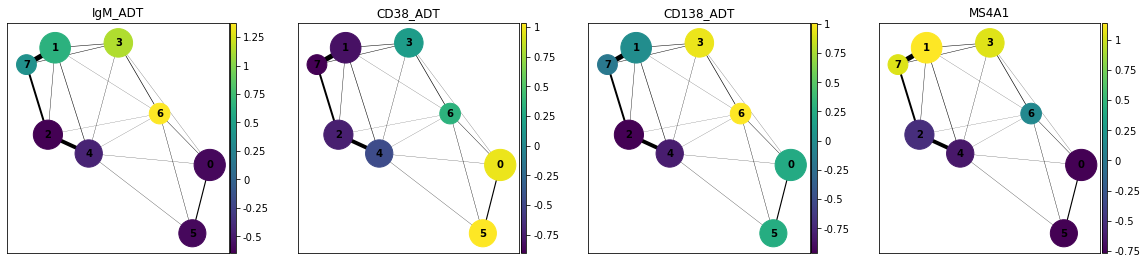

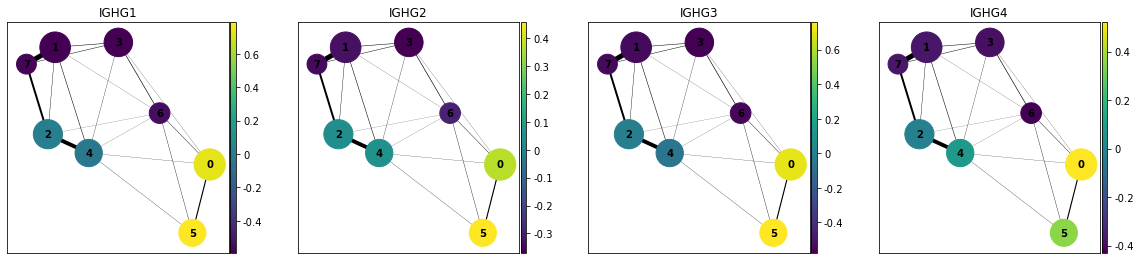

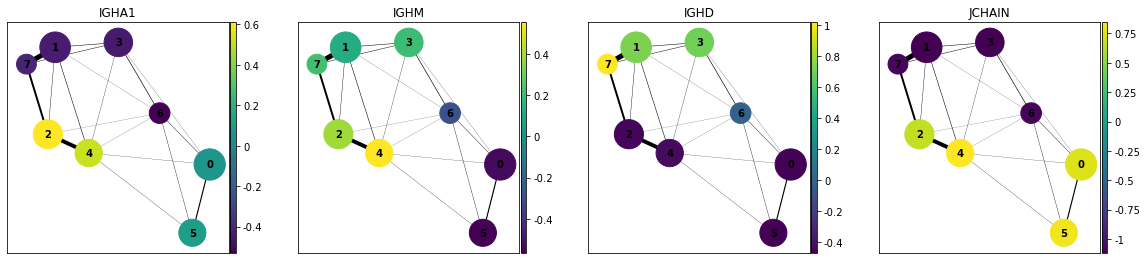

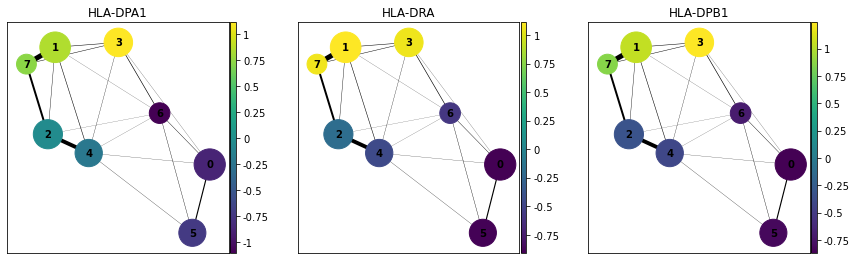

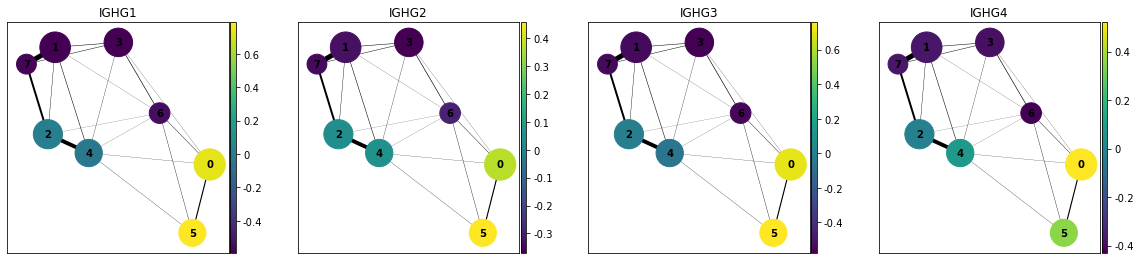

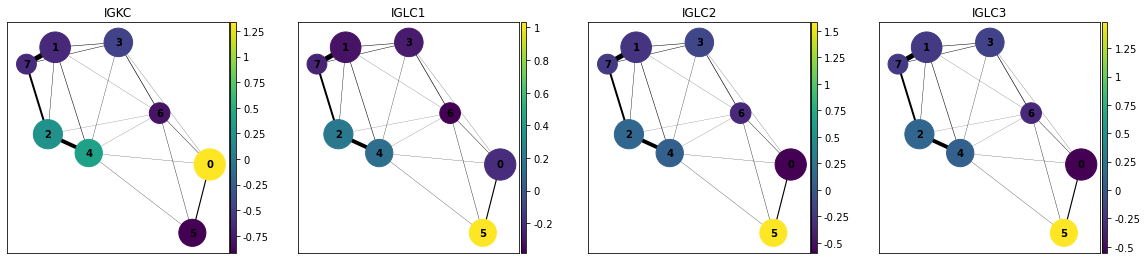

In [2949]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2, color=['IgM_ADT', 'CD38_ADT', 'CD138_ADT', 'MS4A1'])
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2,color=['IGHG1','IGHG2','IGHG3','IGHG4'])
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2,color=['IGHA1','IGHM','IGHD','JCHAIN'])
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2,color=['HLA-DPA1', 'HLA-DRA','HLA-DPB1'])
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2,color=['IGHG1','IGHG2','IGHG3','IGHG4'])
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2,color=['IGKC','IGLC1','IGLC2','IGLC3'])


In [2950]:
rnap.obs['louvain'].cat.categories


Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [2951]:
rnap.obs['louvain_anno'] = rnap.obs['louvain']


In [2953]:
sc.tl.paga(rnap, groups='louvain_anno')


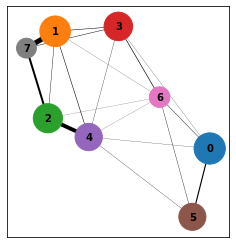

In [2954]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.paga(rnap,node_size_scale=5,edge_width_scale=2)
# dpt_pseudotime
# plt.show()

In [2988]:
rnap_=rnap.copy()

In [2989]:
sc.tl.diffmap(rnap_,n_comps=10)
sc.pp.neighbors(rnap_, n_neighbors=20, use_rep='X_diffmap')

In [2990]:
sc.tl.draw_graph(rnap_, init_pos='paga')

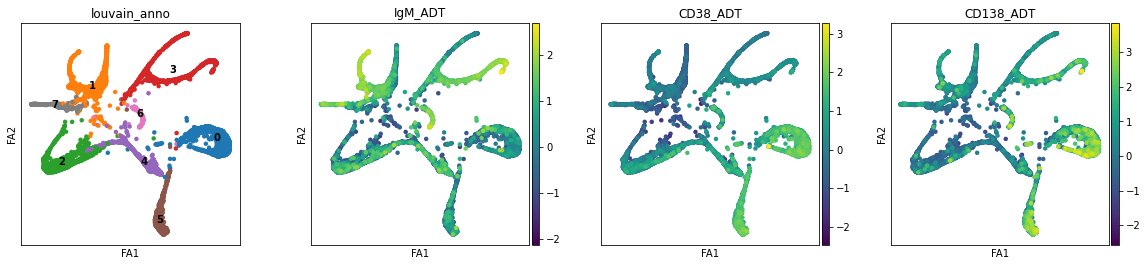

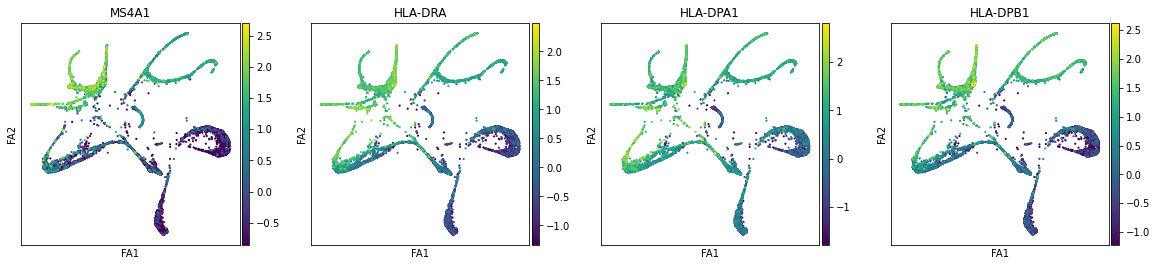

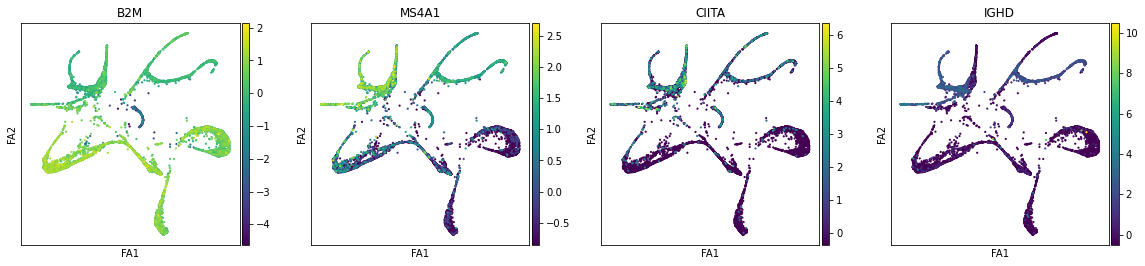

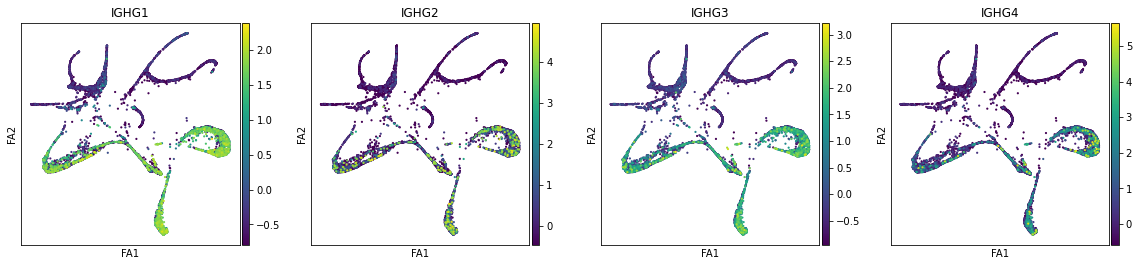

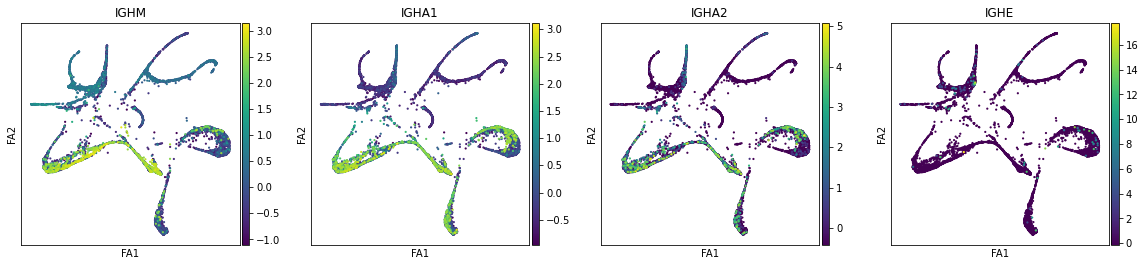

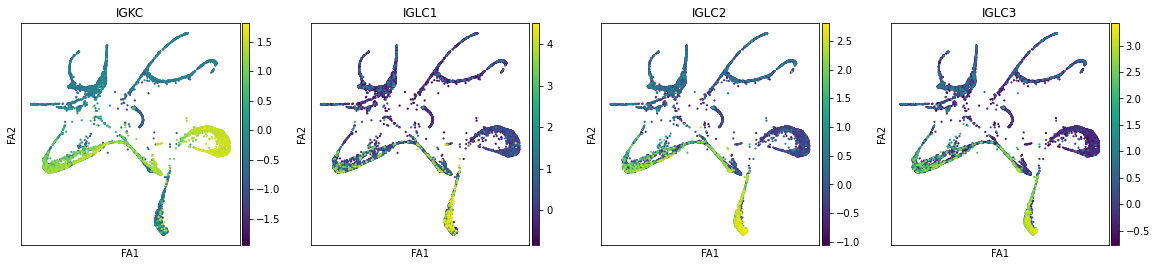

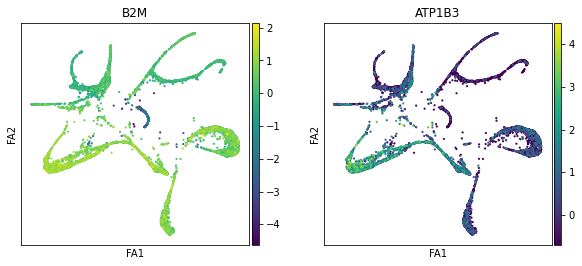

In [3722]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.draw_graph(rnap_, color=['louvain_anno','IgM_ADT','CD38_ADT','CD138_ADT'], legend_loc='on data',size=80)
    sc.pl.draw_graph(rnap_, color=['MS4A1','HLA-DRA','HLA-DPA1','HLA-DPB1'], legend_loc='on data')
    sc.pl.draw_graph(rnap_, color=['B2M','MS4A1','CIITA','IGHD'], legend_loc='on data')
    sc.pl.draw_graph(rnap_, color=['IGHG1','IGHG2','IGHG3','IGHG4'], legend_loc='on data')
    sc.pl.draw_graph(rnap_, color=['IGHM','IGHA1','IGHA2','IGHE'], legend_loc='on data')
    sc.pl.draw_graph(rnap_, color=['IGKC','IGLC1','IGLC2','IGLC3'], legend_loc='on data')
    sc.pl.draw_graph(rnap_, color=['B2M','ATP1B3'], legend_loc='on data')


In [2992]:
rnap_.uns['iroot'] = np.flatnonzero(rnap_.obs['louvain_anno']  == '1')[0]


In [2993]:
sc.tl.dpt(rnap_)


In [2994]:
exp97r=exp97.copy()

sc.pp.log1p(exp97r)
sc.pp.scale(exp97r)
rnap_.raw = exp97r

In [3654]:
#cluster 6 wild card, with 2 humanin like gene (MTRNR2L12/8), not clear function, 
#and bunch of genes have no annotation/unknown function, high HTO but RNAseq low
rnapn=rnap_[~(rnap_.obs['clusters']=='6')]
rnap6=rnap_[(rnap_.obs['clusters']=='6')]

In [3754]:
rnapn.obs['louvain_anno'].cat.categories = ['0','1','2','3','4','5','6']


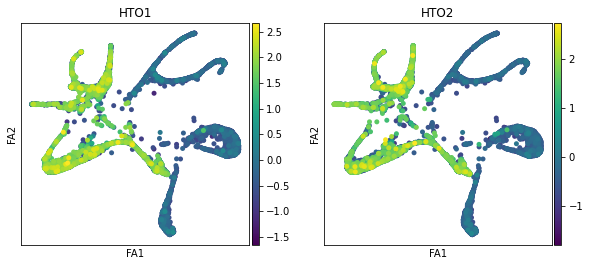

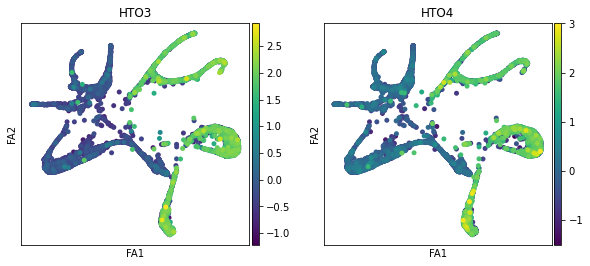

In [3811]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.draw_graph(rnapn, color=['HTO1', 'HTO2',], legend_loc='on data', size=100)
    sc.pl.draw_graph(rnapn, color=['HTO3', 'HTO4'], legend_loc='on data', size=100)

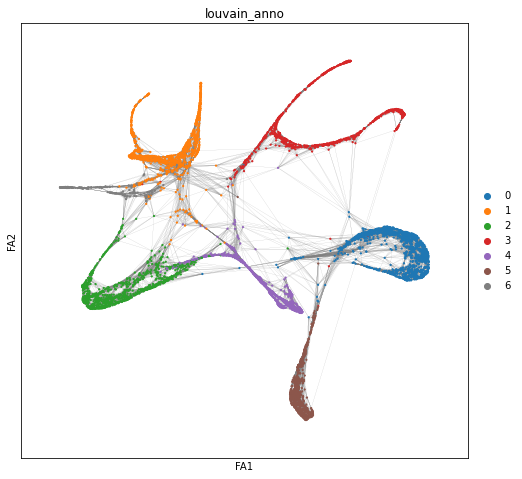

In [3870]:
with rc_context({'figure.figsize': (8, 8)}):

#     ax = sc.pl.draw_graph(rnapn, size=100, show=False)
    sc.pl.draw_graph(rnapn, color=["louvain_anno"],
    size=20,
    edges=True,
#     color_map='binary',
#     add_outline=True, outline_width=(0.2, 0.05), outline_color=('black', 'white'),
#     ax=ax
    )
#     ax.set_xlabel(''),
#     ax.set_ylabel(''),
#     ax.set_title('')

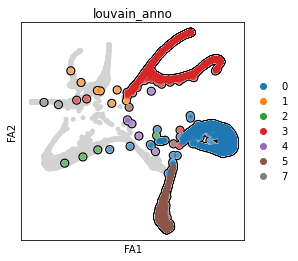

In [3860]:
with rc_context({'figure.figsize': (4, 4)}):

    ax = sc.pl.draw_graph(rnapn, size=100, show=False)
    sc.pl.draw_graph(
    rnapn[(rnapn.obs["Classification"] == "HTO3")|(rnapn.obs["Classification"] == "HTO4")],
    size=150,
    color="louvain_anno",
    color_map='binary',
    add_outline=True, outline_width=(0.2, 0.05), outline_color=('black', 'white'),
    ax=ax
    
    )


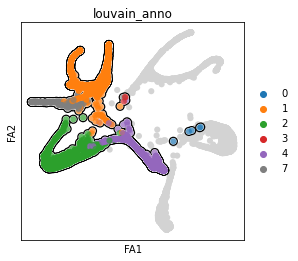

In [3869]:
with rc_context({'figure.figsize': (4, 4)}):

    ax = sc.pl.draw_graph(rnapn, size=150, show=False)
    sc.pl.draw_graph(
            rnapn[(rnapn.obs["Classification"] == "HTO1")|(rnapn.obs["Classification"] == "HTO2")],
            size=150,
            color="louvain_anno",
            add_outline=True, outline_width=(0.2, 0.05), outline_color=('black', 'white'), ax=ax,
                )

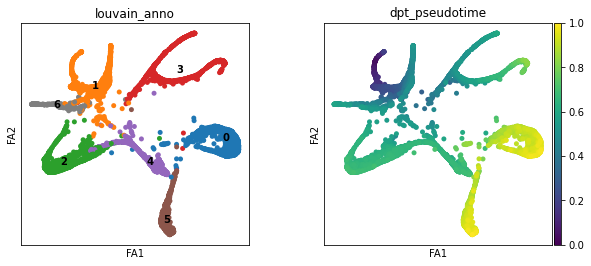

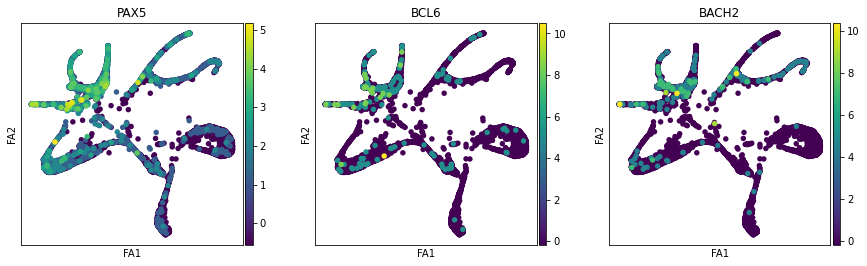

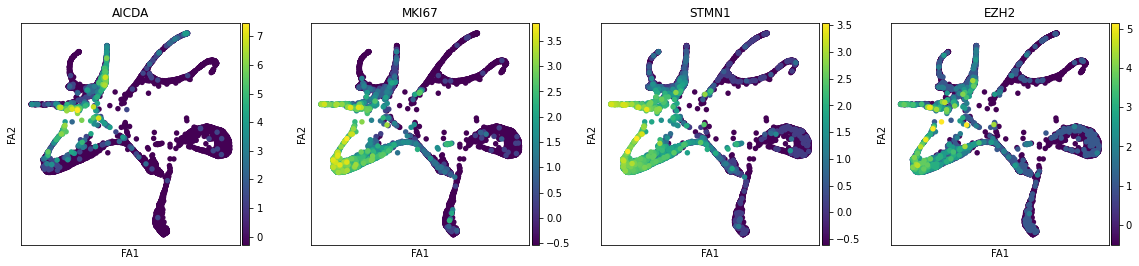

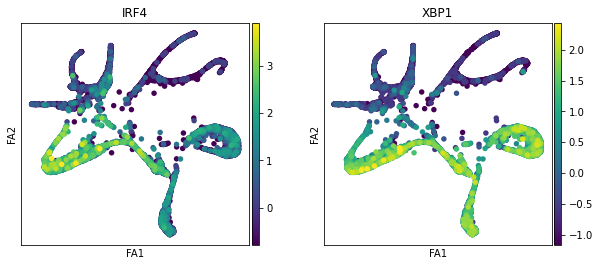

In [3794]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.draw_graph(rnapn, color=['louvain_anno', 'dpt_pseudotime'], legend_loc='on data', size=100)
#     sc.pl.draw_graph(rnap_, color=['HTO1'?P6', 'MT-CO1','MT-CO2','MT-CO3'], legend_loc='on data',size=120)
    sc.pl.draw_graph(rnapn, color=['PAX5','BCL6','BACH2'], legend_loc='on data',size=120)
    sc.pl.draw_graph(rnapn, color=['AICDA','MKI67','STMN1','EZH2'], legend_loc='on data',size=120)
    sc.pl.draw_graph(rnapn, color=['IRF4','XBP1'], legend_loc='on data',size=120)
        

In [3944]:
rnapn

View of AnnData object with n_obs × n_vars = 6011 × 1000
    obs: 'most_likely_hypothesis', 'Classification', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_all', 'louvain', 'louvain_anno', 'dpt_pseudotime', 'distance', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'louvain', 'paga', 'louvain_sizes', 'louvain_anno_sizes', 'louvain_anno_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'clusters_colors', 'rank_genes_groups', 'rank_genes_groups_filtered', 'dendrogram_louvain_anno'
    obsm: 'X_pca', 'X_diffmap', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [3746]:
dp=sc.pl.draw_graph(rnapn, color=['louvain_anno', 'dpt_pseudotime'], legend_loc='on data', size=100)
dp.style(alpha)

[<AxesSubplot:title={'center':'PAX5'}>,
 <AxesSubplot:title={'center':'BCL6'}, xlabel='FA1', ylabel='FA2'>]

In [3049]:
rnap_.raw


In [3005]:
n=len(rnap_.obs['louvain'].cat.categories)
for i in range(0,n):
#     exec("m"+str(i)+" = np.median(rnap_.obs[rnap_.obs['louvain']=='" +str(i)+ "']['dpt_pseudotime'])")
    exec("m"+str(i)+" = np.mean(rnap_.obs[rnap_.obs['louvain']=='" +str(i)+ "']['dpt_pseudotime'])")

mklist=[]
for i in range(0,n):
    exec('mklist.append(m'+str(i)+')')
    s=np.array(mklist)
sort_index = np.argsort(s)
print(sort_index)


[1 7 3 4 2 6 0 5]


In [2998]:
rnap_.obs['distance'] =rnap_.obs['dpt_pseudotime']


In [2999]:
rnap_.obs['clusters'] = rnap_.obs['louvain_anno']  # just a cosmetic change


In [3000]:
rnap_.uns['clusters_colors'] = rnap_.uns['louvain_anno_colors']


In [3643]:
paths = [('B cells',list(sort_index))]
paths = [('B cells',[1, 7, 3, 2, 4, 0, 5])]




In [3875]:
gene_names = [
#             'IgM_ADT','MS4A1','CD22','CD79B','BANK1','REL','PTPN6','CD19','BIRC3'
#             'CIITA','HLA-DRA','HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DQB1','CD74','ITGA2B'
# #               'TMSB4X','IGHD',
#               'CIITA','PAX5','SPIB','AICDA'
#               'ACTG1','CFL1','MYL12B','TPI1','MKI67'
#               'IFIT1','IFIT2','IFIT3', 'MX2',   #IFNstim
#              'IRF9','IRF7','OAS1', 'STAT1', 'SAMD9','IFI27',
#               'CAV1',  'VDR',
    'SLC3A2','IRF4','PRDM1','MZB1',
             'XBP1','JCHAIN','CD27','CD38','SDC1','ITGA6','CD38_ADT',
#              'ITGA4','ITGA6','ITGA10','ITGAL','ITGB1','ITGB2','SLAMF1','CD48','SLAMF6','SLAMF7',
#     'ICAM2','ICAM3'
#     'ITGAL', 'CD47','CTLA4','CD274',
#               'MKI67',
#               'IGHD','IGHM','IGHA1','IGHA2','IGHG1','IGHG2','IGHG3','IGHG4','IGHE',
#             'IGKC',
#               'IGLC1','IGLC2','IGLC3',
#               'HTO1','HTO2','HTO3','HTO4','XIST','CD138_ADT'
#             'ITGA6','CD59','RRBP1','IGHGP','PRDX4','IFI27','FKBP11','SEC61B'

             ]

gene_names_=['IGHD','IGHM','IGHG1','IGHG2','IGHG3','IGHG4','IGHA1','IGHA2','IGHE',
            'IGKC',
              'IGLC1','IGLC2','IGLC3'
            ]

0 ('B cells', [1, 7, 3, 2, 4, 0, 5])


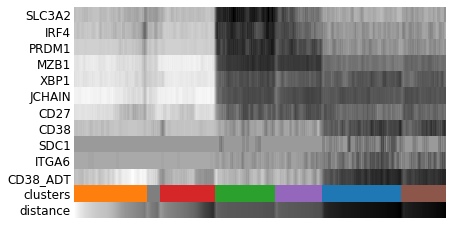

In [3878]:
_, axs = plt.subplots(ncols=1, figsize=(6,round(len(gene_names)/3) ), gridspec_kw={'wspace': 0.05, 'left': 0.12})
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    print (ipath,(descr, path))
    _, data = sc.pl.paga_path(
        rnap_, path, gene_names,
        show_node_names=False,
#         ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='viridis',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title=''.format(descr),
        return_data=True,
        show=False)

plt.show()

In [3656]:
rnap6

ArrayView([[ 0.22816151 , -0.19706726 , -0.012644054, ...,  1.676589   ,
             1.163579   ,  1.5975577  ],
           [-0.5745188  , -0.19706726 , -0.012644054, ...,  1.4302924  ,
             0.46663424 ,  1.6088198  ],
           [-0.14563821 , -0.19706726 , -0.012644054, ..., -0.027581409,
             1.0971545  ,  1.6441126  ],
           ...,
           [-1.0963246  , -0.19706726 , -0.012644054, ...,  0.060146432,
             0.7278395  ,  1.66054    ],
           [ 0.2501259  , -0.19706726 , -0.012644054, ...,  0.84288657 ,
             1.5808461  ,  1.5358583  ],
           [-1.0963246  , -0.19706726 , -0.012644054, ..., -0.07802046 ,
             0.7892783  ,  1.7108047  ]], dtype=float32)

0 ('B cells', [1, 7, 3, 2, 4, 0, 5])


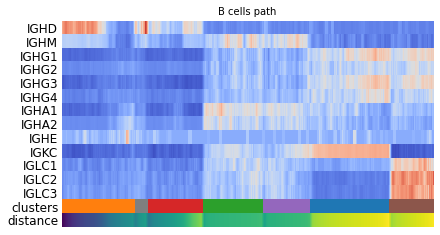

In [3601]:
_, axs = plt.subplots(ncols=1, figsize=(6, round(len(gene_names_)/3)), gridspec_kw={'wspace': 0.05, 'left': 0.12})
plt.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    print (ipath,(descr, path))
    _, data = sc.pl.paga_path(
        rnap_, path, gene_names_,
        show_node_names=False,
#         ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['distance'],
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='coolwarm',
        groups_key='clusters',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format(descr),
        return_data=True,
        show=False)
    
#     data.to_csv('./write/paga_path_{}.csv'.format(descr))
# plt.savefig('Path_exp93.pdf')
plt.show()

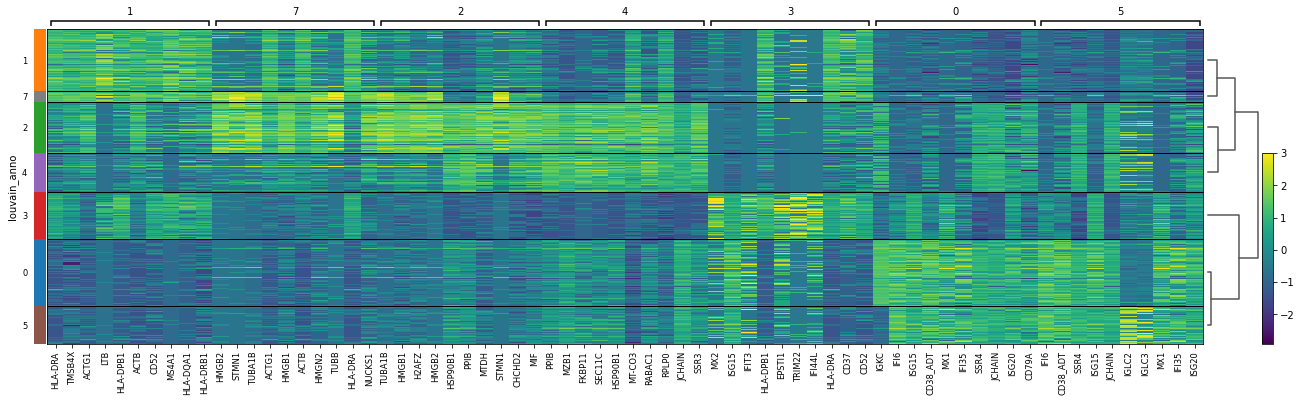

In [3627]:
sc.tl.dendrogram(rnapn,groupby='louvain_anno')
sc.pl.rank_genes_groups_heatmap(rnapn, n_genes=10, show_gene_labels=True,vmax=3)


In [3081]:
marker_genes = {
    'Activated B': {'MS4A1', 'IGHD','HLA-DRA','HLA-DPB'},
    'B-blast': {'MKI67', 'TUBA1B'},
    'pre-PB': {'MZB1','PPIB'},
    'PB_PC': {'IGHG1','IGHG3','CD38_ADT'}
}
marker_matches = sc.tl.marker_gene_overlap(rnap_, marker_genes)

In [3132]:
df=pd.DataFrame(columns=['0','1','2','3','4','5','6','7'])
for i in range(0,100):
    df. loc[i]=list(rnap_.uns['rank_genes_groups']['names'][i])


In [3133]:
df.to_csv('paga_cluster.csv')

In [3125]:
df.loc[0]=list(rnap_.uns['rank_genes_groups']['names'][0])

In [3124]:
list(rnap_.uns['rank_genes_groups']['names'][0])

['IGKC', 'HLA-DRA', 'TUBA1B', 'ISG15', 'PPIB', 'IFI6', 'MTRNR2L12', 'HMGB2']

In [3706]:
dic={'Pseudotime':rnap_.obs['distance'],'Clusters':rnap_.obs['clusters'],
    'CD38':rnap_.obs_vector('CD38_ADT'),
   'CD138':rnap_.obs_vector('CD138_ADT'),
    'IgM':rnap_.obs_vector('IgM_ADT'),
    'ITGA6':rnap_.obs_vector('ITGA6')}

In [3707]:
data_=pd.DataFrame.from_dict(dic)
data=data_[~(data_['Clusters']=='6')]

In [3709]:
for i in (set(data['Clusters'])):
    exec("c" + str(i) + "= data[data['Clusters']=='"+str(i)+"']")

In [3710]:
for i in set(data_['Clusters']):
    exec("t" + str(i) + "= np.mean(data[data['Clusters']=='"+str(i)+"']['Pseudotime'])")

In [3711]:
y='IgM'
for i in set(data['Clusters']):
    exec("m" + str(i) + "= np.mean(data[data['Clusters']=='"+str(i)+"'][y])")
t=[t1,t7,t2,t4,t0,t5]
m=[m1,m7,m2,m4,m0,m5]

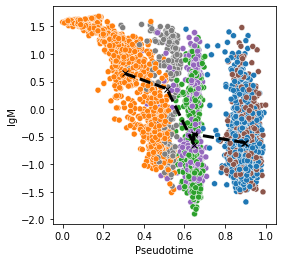

In [3718]:
fig=plt.figure(figsize=(4,4))
sns.scatterplot(data=data[cond], x="Pseudotime", y="IgM", hue="Clusters")
plt.plot(t,m,'--xk',linewidth=3)
plt.legend([],[], frameon=False)


In [3719]:
y='CD38'
for i in set(data['Clusters']):
    exec("m" + str(i) + "= np.mean(data[data['Clusters']=='"+str(i)+"'][y])")
t=[t1,t7,t2,t4,t0,t5]
m=[m1,m7,m2,m4,m0,m5]

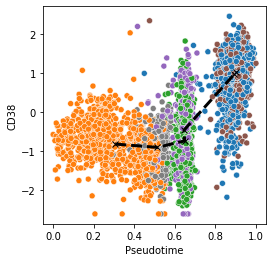

In [3720]:
fig=plt.figure(figsize=(4,4))
sns.scatterplot(data=data[cond], x="Pseudotime", y="CD38", hue="Clusters")
plt.legend([],[], frameon=False)
plt.plot(t,m,'--xk',linewidth=3)


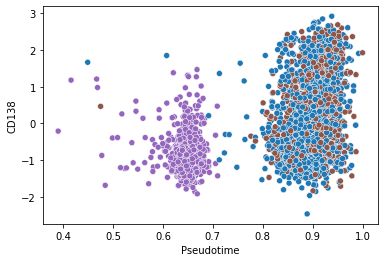

In [3475]:
cond=(data['Clusters']=='5') | (data['Clusters']=='0') |(data['Clusters']=='4')
fig=plt.figure(figsize=(6,4))
sns.scatterplot(data=data[cond], x="Pseudotime", y="CD138", hue="Clusters")
plt.legend([],[], frameon=False)
# plt.xlim(0.75,1)